# Analyse exploratoire des données du site e-commerce Olist

Ce notebook regroupe les travaux d'analyse exploratoire en vue de réaliser une segmentation client de la marketplace.

## Contexte

La maketplace brésilienne [Olist](https://olist.com/) cherche à réaliser une segmentation de ses clients afin de réaliser de futures actions de communication/marketing. 

Afin de la réliaser le site mais à disposition les [données des transactions réalisée depuis janvier 2017](https://www.kaggle.com/olistbr/brazilian-ecommerce). Celles-ci sont réparties dans plusieurs fichiers:

- olist_customers_dataset.csv : Listing des clients
- olist_geolocalisation_dataset.csv: Données de localisation des clients
- olist_order_items_dataset.csv: listing des produits commandés
- olist_order_payments_dataset.csv: Listing des paiements 
- olist_order_reviews_dataset.csv: Listing des évaluations clients
- olist_orders8dataset.csv: Listing des commandes
- olist_sellers_dataset.csv: Listing des vendeurs
- olist_product_category_name_translaion.csv

- olist_marketing_qualified_leads_dataset.csv : leads qualifiés
- olist_closed_deals_dataset.csv: Transactions réalisées

Le site souhaite également qu'un devis de contrat de maintenance de la segmentation soit réalisé.

Les élements du brief sont disponnibles [en ligne](https://openclassrooms.com/fr/paths/148/projects/630/assignment). 

## Importation des données

Nous commençons par visualiser tous les jeux de données afin d'identifier des jointure qui seraient pertinentes de réaliser.

In [1]:
import IPython.display
import pandas as pd
pd.set_option("display.max_columns", None)

import seaborn as sns
from pylab import *
%matplotlib inline
plt.style.use("seaborn")


cu = pd.read_csv("data/olist_customers_dataset.csv")
print("Cinq premières observations du fichier olist_customers_dataset.csv ")
display(cu.head())
print(f"Nombre d'observations du dataset: {cu.shape[0]}, nombre de variables {cu.shape[1]}\n")
print("-"*150)

ge = pd.read_csv("data/olist_geolocation_dataset.csv")
print("Cinq premières observations du fichier olist_geolocation_dataset.csv")
display(ge.head())
print(f"Nombre d'observations du dataset: {ge.shape[0]}, nombre de variables {ge.shape[1]}\n")
print("-"*150)

oi = pd.read_csv("data/olist_order_items_dataset.csv")
print("Cinq premières observations du fichier olist_order_items_dataset.csv")
display(oi.head())
print(f"Nombre d'observations du dataset: {oi.shape[0]}, nombre de variables {oi.shape[1]}\n")
print("-"*150)

op = pd.read_csv("data/olist_order_payments_dataset.csv")
print("Cinq premières observations du fichier olist_order_payments_dataset.csv")
display(op.head())
print(f"Nombre d'observations du dataset: {op.shape[0]}, nombre de variables {op.shape[1]}\n")
print("-"*150)

ore = pd.read_csv("data/olist_order_reviews_dataset.csv")
print("Cinq premières observations du fichier olist_order_reviews_dataset.csv")
display(ore.head())
print(f"Nombre d'observations du dataset: {ore.shape[0]}, nombre de variables {ore.shape[1]}\n")
print("-"*150)

od = pd.read_csv("data/olist_orders_dataset.csv")
print("Cinq premières observations du fichier olist_orders_dataset.csv")
display(od.head())
print(f"Nombre d'observations du dataset: {od.shape[0]}, nombre de variables {od.shape[1]}\n")
print("-"*150)

pda = pd.read_csv("data/olist_products_dataset.csv")
print("Cinq premières observations du fichier olist_products_dataset.csv")
display(pda.head())
print(f"Nombre d'observations du dataset: {pda.shape[0]}, nombre de variables {pda.shape[1]}\n")
print("-"*150)

sd = pd.read_csv("data/olist_sellers_dataset.csv")
print("Cinq premières observations du fichier olist_sellers_dataset.csv")
display(sd.head())
print(f"Nombre d'observations du dataset: {sd.shape[0]}, nombre de variables {sd.shape[1]}\n")
print("-"*150)

pcn = pd.read_csv("data/product_category_name_translation.csv")
print("Cinq premières observations du fichier product_category_name_translation.csv")
display(pcn.head())
print(f"Nombre d'observations du dataset: {pcn.shape[0]}, nombre de variables {pcn.shape[1]}\n")
print("-"*150)

Cinq premières observations du fichier olist_customers_dataset.csv 


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Nombre d'observations du dataset: 99441, nombre de variables 5

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_geolocation_dataset.csv


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Nombre d'observations du dataset: 1000163, nombre de variables 5

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_order_items_dataset.csv


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Nombre d'observations du dataset: 112650, nombre de variables 7

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_order_payments_dataset.csv


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Nombre d'observations du dataset: 103886, nombre de variables 5

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_order_reviews_dataset.csv


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Nombre d'observations du dataset: 100000, nombre de variables 7

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_orders_dataset.csv


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Nombre d'observations du dataset: 99441, nombre de variables 8

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_products_dataset.csv


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Nombre d'observations du dataset: 32951, nombre de variables 9

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_sellers_dataset.csv


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Nombre d'observations du dataset: 3095, nombre de variables 4

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier product_category_name_translation.csv


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Nombre d'observations du dataset: 71, nombre de variables 2

------------------------------------------------------------------------------------------------------------------------------------------------------


Voici l'odre des jointures que nous allons réaliser:
1. olist_customers_dataset.csv et  olist_orders_dataset
2. olist_orders_items sur la résultat de la précédente jointure
3. olist_products_dataset.csv sur le résultat de la précédente jointure
4. olist_sellers_dataset.csv sur le résultat de la précédente jointure
5. olist_order_payments_dataset.csv sur le résultat de la précédente jointure
6. olist_order_reviews_dataset.csv sur le résultat de la précédente jointure 

Le dataset product_category_name_translation ne fera pas l'objet d'une jointure mais servira à remaplacer les modalités de la colonne product_category_name

In [2]:
print("jointure  olist_customers_dataset.csv et  olist_orders_dataset.csv")
cuod = cu.merge(od, how='left', on='customer_id')
print("Affichage des cinq premières lignes du résultat")
display(cuod.head())
print(f"Nombre d'observations: {cuod.shape[0]}, nombre de variables {cuod.shape[1]}\n")
print('-'*150)

print("Jointure avec olist_orders_items")
cuodi = cuod.merge(oi, how='left', on='order_id')
print("Affichage des cinq premières lignes du résultat")
display(cuodi.head())
print(f"Nombre d'observations: {cuodi.shape[0]}, nombre de variables: {cuodi.shape[1]}\n")
print('-'*150)

print("Jointure avec olist_products_dataset")
cuodip = cuodi.merge(pda, how='left', on='product_id')
print("Affichage des cinq premières lignes du résultat")
display(cuodip.head())
print(f"Nombre d'observations: {cuodip.shape[0]}, nombre de variables: {cuodip.shape[1]}\n")
print('-'*150)

print("Jointure avec olist_sellers_dataset")
cuodips = cuodip.merge(sd, how='left', on='seller_id')
print("Affichage des cinq premières lignes du résultat")
display(cuodips.head())
print(f"Nombre d'observations: {cuodips.shape[0]}, nombre de variables: {cuodips.shape[1]}\n")
print('-'*150)

print("Jointure avec olist_order_payments_dataset.csv")
cuodipsp = cuodips.merge(op, how='left', on='order_id')
print("Affichage des cinq premières lignes du résultat")
display(cuodipsp.head())
print(f"Nombre d'observations: {cuodipsp.shape[0]}, nombre de variables: {cuodipsp.shape[1]}\n")
print('-'*150)

print("Jointure avec olist_order_reviews_dataset.csv")
data = cuodipsp.merge(ore, how='left', on='order_id')
print("Affichage des cinq premières lignes du résultat")
display(data.head())
print(f"Nombre d'observations: {data.shape[0]}, nombre de variables: {data.shape[1]}\n")
print('-'*150)

jointure  olist_customers_dataset.csv et  olist_orders_dataset.csv
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Nombre d'observations: 99441, nombre de variables 12

------------------------------------------------------------------------------------------------------------------------------------------------------
Jointure avec olist_orders_items
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


Nombre d'observations: 113425, nombre de variables: 18

------------------------------------------------------------------------------------------------------------------------------------------------------
Jointure avec olist_products_dataset
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


Nombre d'observations: 113425, nombre de variables: 26

------------------------------------------------------------------------------------------------------------------------------------------------------
Jointure avec olist_sellers_dataset
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP


Nombre d'observations: 113425, nombre de variables: 29

------------------------------------------------------------------------------------------------------------------------------------------------------
Jointure avec olist_order_payments_dataset.csv
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,1.0,credit_card,8.0,252.25


Nombre d'observations: 118434, nombre de variables: 33

------------------------------------------------------------------------------------------------------------------------------------------------------
Jointure avec olist_order_reviews_dataset.csv
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


Nombre d'observations: 119151, nombre de variables: 39

------------------------------------------------------------------------------------------------------------------------------------------------------


In [3]:
print(f"Pourcentage des commandes avec un seul produit {cuodi[cuodi['order_item_id']==1].shape[0]/cuodi.shape[0]*100:.2f}%")

Pourcentage des commandes avec un seul produit 86.99%


## Remplacement des modalités de la variable product_category_name

In [4]:
translation_dict= pcn.set_index('product_category_name').to_dict(orient='dict')['product_category_name_english']
translation_dict
data['product_category_name'] = data['product_category_name'].map(translation_dict)
data['product_category_name']

0               office_furniture
1                     housewares
2               office_furniture
3               office_furniture
4                   home_confort
                   ...          
119146    books_general_interest
119147            sports_leisure
119148             health_beauty
119149             watches_gifts
119150                 perfumery
Name: product_category_name, Length: 119151, dtype: object

## Valeurs aberrantes

### Numéros de commandes dupiqués

Vérifions s'il existe des commandes avec un order_id et un order_item_id identiques 

In [5]:
display(data[data.duplicated(subset=['order_id', 'order_item_id'], keep=False)])
print(f"Nombre de commandes avec doublonnées {data[data.duplicated(subset=['order_id','order_item_id'])].shape[0]}")
print(f"Proportions des commandes doublonnées {round(data[data.duplicated(subset=['order_id', 'order_item_id'])].shape[0] / data.shape[0] *100,2)}% ")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
18,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30 00:00:00,1.0,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-05-19 11:55:16,89.90,12.13,bed_bath_table,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,14940.0,ibitinga,SP,2.0,voucher,1.0,34.05,906a95443d18edb22906a4d9e3278428,3,NaN,o produto não foi entregue ainda por inconsist...,2017-06-03 00:00:00,2017-06-03 10:00:26
19,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30 00:00:00,1.0,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-05-19 11:55:16,89.90,12.13,bed_bath_table,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,14940.0,ibitinga,SP,1.0,credit_card,1.0,67.98,906a95443d18edb22906a4d9e3278428,3,NaN,o produto não foi entregue ainda por inconsist...,2017-06-03 00:00:00,2017-06-03 10:00:26
38,469634941c27cd844170935a3cf60b95,ef07ba9aa5226f77264ffa5762b2280b,81750,curitiba,PR,a9119eb77d6200811953803a7b6539e1,delivered,2018-03-12 13:07:03,2018-03-12 13:15:28,2018-03-13 22:12:18,2018-03-22 18:28:55,2018-03-29 00:00:00,1.0,aa280035c50ba62c746480a59045eec4,fa40cc5b934574b62717c68f3d678b6d,2018-03-16 13:15:28,30.50,15.23,toys,56.0,678.0,3.0,200.0,16.0,8.0,11.0,2310.0,sao paulo,SP,2.0,voucher,1.0,44.92,cd061bfa6e03dfb627117779e74ad9ad,5,NaN,NaN,2018-03-23 00:00:00,2018-03-26 16:23:27
39,469634941c27cd844170935a3cf60b95,ef07ba9aa5226f77264ffa5762b2280b,81750,curitiba,PR,a9119eb77d6200811953803a7b6539e1,delivered,2018-03-12 13:07:03,2018-03-12 13:15:28,2018-03-13 22:12:18,2018-03-22 18:28:55,2018-03-29 00:00:00,1.0,aa280035c50ba62c746480a59045eec4,fa40cc5b934574b62717c68f3d678b6d,2018-03-16 13:15:28,30.50,15.23,toys,56.0,678.0,3.0,200.0,16.0,8.0,11.0,2310.0,sao paulo,SP,1.0,credit_card,1.0,0.81,cd061bfa6e03dfb627117779e74ad9ad,5,NaN,NaN,2018-03-23 00:00:00,2018-03-26 16:23:27
60,8247b5583327ab8be19f96e1fb82f77b,d85547cd859833520b311b4458a14c1c,23970,parati,RJ,a6917b5d71e0e9bc434e9228db8daeb2,delivered,2017-06-09 15:46:17,2017-06-10 15:42:38,2017-06-12 17:10:55,2017-06-19 19:32:32,2017-07-04 00:00:00,1.0,28c95d7653177449fd4b6fc7adb63ce9,7e93a43ef30c4f03f38b393420bc753a,2017-06-15 15:42:38,788.42,21.28,watches_gifts,37.0,438.0,1.0,450.0,18.0,11.0,14.0,6429.0,barueri,SP,2.0,voucher,1.0,499.72,e4d4b6477ff4777b725e5d5682fa785d,1,NaN,Me mandaram um o relógio que não funciona.. Vo...,2017-06-22 00:00:00,2017-06-23 00:32:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119134,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:20,2017-11-25 02:33:11,2017-11-27 18:24:54,2017-12-04 21:13:10,2017-12-20 00:00:00,1.0,5d66715cc928aadd0074f61332698593,128639473a139ac0f3e5f5ade55873a5,2017-11-30 02:31:41,19.90,12.48,electronics,52.0,390.0,1.0,150.0,20.0,13.0,18.0,87050.0,maringa,PR,1.0,voucher,1.0,20.00,75dcc8635930dd09103505944e12451a,4,NaN,Gos

Nombre de commandes avec doublonnées 5726
Proportions des commandes doublonnées 4.81% 


Nous décidons de supprimer les doublons.

In [6]:
data.drop_duplicates(subset=['order_id','order_item_id'], inplace=True)
print(f"Nombre d'observations restantes: {data.shape[0]}")

Nombre d'observations restantes: 113425


### Valeurs manquantes

In [7]:
def test_completion(data):
    """
    Compute sorted completion rate and number of missing values for each variable of the argument in a descending order
    
    Args:
        data(dataset) : A dataset with variables
        
    Returns:
        A specific dataframe with completion rate for each variable. 
        Schema :
            Index(string): Variable names
            Taux de completion(float): completion rate
            Nombre de valeurs manquantes(int): Number of missing values
    """
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de complétion", "Nombre de valeurs manquantes"]).sort_values(by="Taux de complétion", ascending=False)

test_completion(data)

,Taux de complétion,Nombre de valeurs manquantes
customer_id,100.00,0
order_estimated_delivery_date,100.00,0
review_creation_date,100.00,0
review_score,100.00,0
review_id,100.00,0
payment_value,100.00,3
payment_installments,100.00,3
payment_type,100.00,3
payment_sequential,100.00,3
customer_unique_id,100.00,0


## Gestion du status des commandes

Au cours des traitements, il est apparu que certaines modalités de la variable order_status génèrent des erreurs lors de la construction de variables. Commençons par étudier la distribution des modialités de la variable.

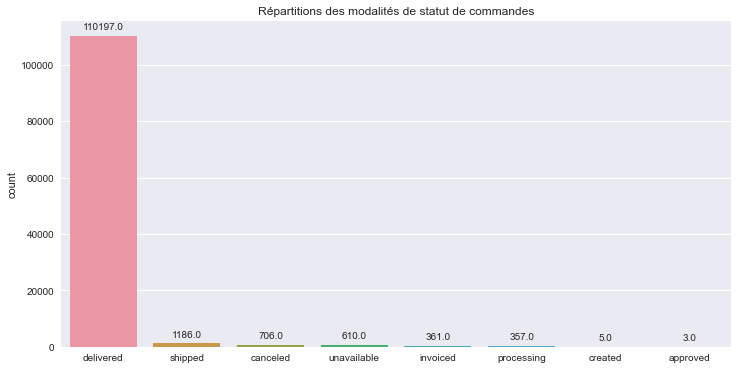

Tableau de containgences des status des commandes


,count,proportion
delivered,110197,97.15
shipped,1186,1.05
canceled,706,0.62
unavailable,610,0.54
invoiced,361,0.32
processing,357,0.31
created,5,0.00
approved,3,0.00


Nombre d'observations n'ayant pas le statut delivered: 3228
Proportion des observations n'ayant pas un status delivered: 2.84%


In [8]:
status = pd.DataFrame(data['order_status'].value_counts())
status['proportion'] = round(status['order_status']/data.shape[0]*100,2)
status.rename(columns={'order_status':'count'}, inplace=True)

plt.figure(figsize=(12,6))
bplot = sns.barplot(data=status, x=status.index, y='count')
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Répartitions des modalités de statut de commandes")
plt.show()

print("Tableau de containgences des status des commandes")
display(status)
print(f"Nombre d'observations n'ayant pas le statut delivered: {status[status.index!='delivered']['count'].sum()}")
print(f"Proportion des observations n'ayant pas un status delivered: {status[status.index!='delivered']['proportion'].sum()}%")

Il apparaî que la modalité delivered est ultra majoritaire. Comparons maintenant le taux de complétion des variables en comparant les modalité delivered et autres modalités.

In [9]:
completion_comparison = test_completion(data)
completion_delivered = test_completion(data[data['order_status']=='delivered'])
completion_others = test_completion(data[data['order_status']!='delivered'])


completion_comparison.rename(columns={'taux de complétion' : 'taux de complétion total', 'Nombre de valeurs manquantes' : 'valeurs manquantes totales'}, inplace=True)
completion_comparison['taux de completion statut delivered'] = completion_delivered['Taux de complétion']
completion_comparison['valeurs manquantes statut delivered'] = completion_delivered['Nombre de valeurs manquantes']
completion_comparison['taux de completion statut autre'] = completion_others['Taux de complétion']
completion_comparison['valeurs manquantes statut autre'] = completion_others['Nombre de valeurs manquantes']

completion_comparison

,Taux de complétion,valeurs manquantes totales,taux de completion statut delivered,valeurs manquantes statut delivered,taux de completion statut autre,valeurs manquantes statut autre
customer_id,100.00,0,100.00,0,100.00,0
order_estimated_delivery_date,100.00,0,100.00,0,100.00,0
review_creation_date,100.00,0,100.00,0,100.00,0
review_score,100.00,0,100.00,0,100.00,0
review_id,100.00,0,100.00,0,100.00,0
payment_value,100.00,3,100.00,3,100.00,0
payment_installments,100.00,3,100.00,3,100.00,0
payment_type,100.00,3,100.00,3,100.00,0
payment_sequential,100.00,3,100.00,3,100.00,0
customer_unique_id,100.00,0,100.00,0,100.00,0


On constate que le taux de complétion, hormis de rares execeptions, s'améliore sensiblement en ne concidérant que les observations ayant une modalité delivered sur la variable. Observons maintenant les premières observation n'ayant pas cette modalité.

In [10]:
print("20 premières observations n'ayant pas une modalité delivered pour la variable order_status")
data[data['order_status']!='delivered'].head(20)

20 premières observations n'ayant pas une modalité delivered pour la variable order_status


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,73.16,e76cda681b681b65fffa28dfc0030641,1,NaN,Muita demora pra entregar e acima de tudo nao ...,2018-04-11 00:00:00,2018-04-11 13:17:25
53,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaN,NaN,2018-05-24 00:00:00,1.0,76d58c2f53f7d340cb9fe2d8514e38ae,3092c0b297aacfb4bb6e056ebe13b9b8,2018-05-09 05:31:11,129.90,13.35,consoles_games,56.0,586.0,2.0,300.0,25.0,11.0,18.0,7402.0,aruja,SP,1.0,boleto,1.0,143.25,f588cda1416895d04f9960ba794df07b,1,NaN,Comprei o produto fiz o pagamento na semana qu...,2018-05-27 00:00:00,2018-05-28 11:14:56
84,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaN,2018-02-20 00:00:00,1.0,13c270dd3d811877114b2a225436a79a,77530e9772f57a62c906e1c21538ab82,2018-01-26 13:52:40,49.00,25.38,furniture_decor,59.0,1972.0,4.0,300.0,69.0,11.0,11.0,80310.0,curitiba,PR,1.0,credit_card,1.0,74.38,614c979929f4c737a7b5034897a30267,3,NaN,"Não recebi o produto Ainda, mas aguardo recebe...",2018-02-22 00:00:00,2018-02-22 09:30:21
95,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaN,2018-02-09 00:00:00,1.0,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-01-18 17:49:45,122.99,14.61,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0,7133.0,guarulhos,SP,1.0,voucher,1.0,137.60,b3e872bf70b6b54f82b468147ad1319d,1,NaN,Acho um desrespeito pediram pra buscar no corr...,2018-02-16 00:00:00,2018-02-16 14:53:08
119,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaN,2017-09-11 00:00:00,1.0,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69,furniture_decor,59.0,473.0,1.0,600.0,30.0,3.0,20.0,14940.0,ibitinga,SP,1.0,credit_card,5.0,58.59,18a80894de129917815e652bde9bf45a,1,NaN,Fiz a compra e não entregou em minha casa. Fiz...,2017-09-13 00:00:00,2017-09-13 12:44:20
134,8891eb5ca0e28df961b2b5b8f3c0eb23,13ac6da47fef1b17b16f511e03b57918,2632,sao paulo,SP,ff536d93ae4214b4d51c2894ccfc569f,shipped,2017-12-21 09:01:00,2017-12-22 12:33:26,2018-01-03 18:22:09,NaN,2018-01-10 00:00:00,1.0,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,2017-12-29 12:32:10,39.00,8.27,sports_leisure,60.0,1412.0,2.0,433.0,16.0,16.0,16.0,12327.0,jacarei,SP,1.0,credit_card,1.0,47.27,1a6be4c794d5e3da242a364f6a98163f,3,NaN,Chigling,2017-12-28 00:00:00,2017-12-28 22:54:59
155,faafae37ddb3e4af81c10a397bcca35f,1a7a10e9273fca58179bdd0d40843b0c,7243,guarulhos,SP,e9376d90b28f9cdea83d4d850e4bb1a7,invoiced,2017-09-01 15:02:24,2017-09-01 15:15:30,NaN,NaN,2017-09-15 00:00:00,1.0,391a014a66920fa0ce468319264e0232,ce27a3cc3c8

On observe que plusieurs variables liées aux produit comme price, product_category_name, product_weight_g sont partiellement représentées. Nous décions de supprimer les observations n'ayant pas la modalité delivered pour la variable 'order_status'.

In [11]:
other_status_idx = data[data['order_status']!='delivered'].index
data.drop(index=other_status_idx, inplace=True)
print(f"Nombre d'observations supprimées: {len(other_status_idx)}")
print(f"Observations restantes: {data.shape[0]}")

Nombre d'observations supprimées: 3228
Observations restantes: 110197


## Gestion des commandes avec des produits non catégorisés

Nous avons constaté pendant l'exploration que certains produits commandés n'entraient pas dans des catégories de produits. Regardoncs ces observations.

In [12]:
print("CObservations où les produits n'ont pas de catégorie")
display(data[data['product_category_name'].isna()==True])
print(f"Nombre d'obsdrvations avec des produits sans catégorie {data[data['product_category_name'].isna()==True].shape[0]}")

CObservations où les produits n'ont pas de catégorie


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00,1.0,124f74f703e88efe001a10bfa718b6ff,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,NaN,NaN,NaN,NaN,250.0,15.0,8.0,20.0,4142.0,sao paulo,SP,1.0,credit_card,3.0,36.01,2381e1fb0932d9459573a0553dd8a2b5,3,NaN,NaN,2017-11-28 00:00:00,2017-11-28 17:14:46
183,3469ebe2f9aa5e08f1a85ecf20b549e0,755bdc2822a8f01cfcec19ae4dcaae66,5590,sao paulo,SP,f51e3c7f79d1e2c076acbb6af1588b95,delivered,2017-03-10 20:04:32,2017-03-10 20:04:32,2017-03-15 13:27:52,2017-03-17 15:28:13,2017-03-29 00:00:00,1.0,e1da02256dce4dee2207c36853547c7b,520b493b57809f446cb0a233bb3e25c7,2017-03-16 20:04:32,118.00,12.22,NaN,NaN,NaN,NaN,7100.0,27.0,28.0,35.0,11075.0,santos,SP,1.0,credit_card,1.0,130.22,04301c70eecafac0bc5d27bf931a5790,5,NaN,NaN,2017-03-18 00:00:00,2017-03-20 14:56:37
377,41882b0f934c20a88f3d44f382d5e376,5e21109503a635f7ad93db18a7ee4a21,25645,petropolis,RJ,144bc17d37931097a63d8dbb87bfd2a9,delivered,2017-10-24 12:22:30,2017-10-25 02:08:37,2017-10-26 13:27:49,2017-11-06 21:32:14,2017-11-14 00:00:00,1.0,f9b1795281ce51b1cf39ef6d101ae8ab,3771c85bac139d2344864ede5d9341e3,2017-10-31 02:08:37,39.90,16.11,NaN,NaN,NaN,NaN,400.0,32.0,15.0,15.0,18087.0,sorocaba,SP,1.0,boleto,1.0,56.01,a656120aadd5a12303d7eafe2905c511,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 19:23:22
450,9c870d10e364de6d2b00edeb0d76127a,4e22af73a91ab5ed077a5f8033ec0f5f,13232,campo limpo paulista,SP,cb655436a926b3051ca8d308eee56323,delivered,2017-07-29 17:58:58,2017-07-29 18:10:11,2017-08-01 21:23:40,2017-08-11 18:26:01,2017-08-22 00:00:00,1.0,e0f33a3329af6716a0bb47fd7a664439,7e26c750b4cb9f6766f58265ff9ebe95,2017-08-03 18:10:11,49.80,15.10,NaN,NaN,NaN,NaN,200.0,16.0,13.0,14.0,30270.0,belo horizonte,MG,1.0,credit_card,2.0,64.90,59c3780996eab08deaa60cfa6695638f,5,NaN,Valeu a compra,2017-08-12 00:00:00,2017-08-13 00:00:35
468,95556f234fd4ad5aa8872f93455430ac,3574bc798156f406b12f377bf3fdd381,37410,tres coracoes,MG,a8318f40d6ce7e1367863809d56a63c3,delivered,2017-05-05 19:53:12,2017-05-09 09:50:20,2017-05-10 08:47:34,2017-05-16 23:17:35,2017-05-30 00:00:00,1.0,a4d8f727f92014da5dd64116af14634c,63ffcb71394dd8ea3872ed9ffda17c74,2017-05-15 09:50:20,25.00,17.09,NaN,NaN,NaN,NaN,1200.0,30.0,12.0,12.0,24813.0,itaborai,RJ,1.0,boleto,1.0,42.09,aed7b6f87d88f9d818afddc90f8ac87c,3,NaN,O produto chegou rápido e bem embalado. Eu só ...,2017-05-17 00:00:00,2017-05-22 16:29:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118655,8d4958b500ee23ac8441f07a1a672e30,ce60ceaf2d12ac87fa2119a364c89e81,5006,sao paulo,SP,8d13e349d7439353a923d49cc2598833,delivered,2017-11-27 12:26:08,2017-11-27 12:34:30,2017-11-28 20:52:01,2017-11-30 14:45:00,2017-12-11 00:00:00,1.0,090820212dfd8022d676e480bed6a61d,59cd88080b93f3c18508673122d26169,2017-12-01 12:34:30,29.99,8.27,NaN,NaN,NaN,NaN,250.0,16.0,4.0,11.0,11707.0,praia grande,SP,1.0,credit_card,1.0,38.26,7c3aeb31a7c60712309946a5c8d5570c,5,NaN,NaN,2017-12-01 00:00:00,2017-12-01 17:39:43
118791,0129ed0b91663e92e982965f3a6245f6,74ec77145a467b1a96152aac1c3ab13

Nombre d'obsdrvations avec des produits sans catégorie 1559


Nous décidons d'imputer ces valeurs manquantes avec une nouvelle modalité "uncategorized".

In [13]:
uncategorized_idxs = data[data['product_category_name'].isna()==True].index
data.loc[uncategorized_idxs,'product_category_name'] = 'uncategorized'

## Construction de features

### Nombre de commandes par client

Visualisons la distribution de la variable à l'aide d'un diagramme en barres

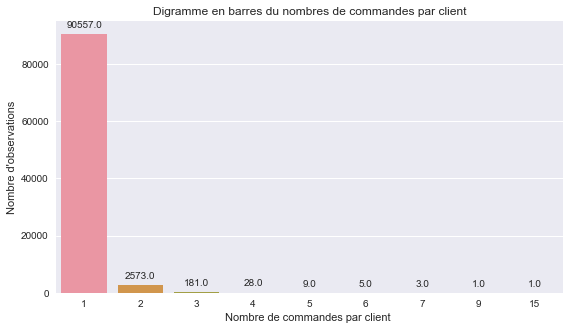

In [14]:
number_of_orders =  data.groupby(['customer_unique_id'], as_index=False).agg({'order_id':'nunique'})
number_of_orders.rename(columns={'order_id':'number_of_orders'}, inplace=True)

nb = number_of_orders['number_of_orders'].value_counts().index
count = number_of_orders['number_of_orders'].value_counts().values

fig = plt.figure(figsize=(20,5))


ax = fig.add_subplot(121)
bplot = sns.barplot(data=number_of_orders, x=nb, y=count)

for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Nombre de commandes par client ")
plt.ylabel("Nombre d'observations")
plt.title("Digramme en barres du nombres de commandes par client")
plt.show()

Nous constatons qu'une grande majorité des clients n'a réalisé qu'une commande sur la période. Nous vérifions les données relative du client qui a réalisé 15 commandes. Observons le client ayant réalisé 15 commandes

In [15]:
max_orders_id = number_of_orders[number_of_orders['number_of_orders']==15].values[0][0]
print("Les 15 commdes du client qui a réalisé la valeur maximale du nombre de commandes")
display(data[data['customer_unique_id']== max_orders_id])

Les 15 commdes du client qui a réalisé la valeur maximale du nombre de commandes


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
17018,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,b850a16d8faf65a74c51287ef34379ce,delivered,2017-11-22 20:01:53,2017-11-22 20:12:32,2017-11-24 16:07:56,2017-11-27 18:49:13,2017-12-04 00:00:00,1.0,5bccc8fe44471df6c7b7e08176837d2f,1da3aeb70d7989d1e6d9b0e887f97c23,2017-11-28 20:12:32,13.99,7.78,sports_leisure,44.0,87.0,3.0,150.0,20.0,20.0,20.0,4265.0,sao paulo,SP,1.0,credit_card,1.0,21.77,68faf98deb4bc8c25eb42f07a1216f46,5,NaN,NaN,2017-11-28 00:00:00,2017-11-28 21:59:16
18371,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,23427a6bd9f8fd1b51f1b1e5cc186ab8,delivered,2018-05-21 22:44:31,2018-05-22 01:53:35,2018-05-22 14:18:00,2018-05-23 15:33:09,2018-05-29 00:00:00,1.0,5cb96c51c55f57503465e4d2558dc053,db4350fd57ae30082dec7acbaacc17f9,2018-05-24 01:53:35,45.99,7.39,sports_leisure,53.0,282.0,1.0,300.0,35.0,6.0,11.0,3126.0,sao paulo,SP,1.0,credit_card,1.0,53.38,cb1172e327bba1a8784de2ecc9107c2e,5,NaN,NaN,2018-05-24 00:00:00,2018-05-24 18:57:51
19961,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,c2213109a2cc0e75d55585b7aaac6d97,delivered,2018-08-07 23:32:14,2018-08-07 23:45:21,2018-08-09 13:35:00,2018-08-10 20:26:44,2018-08-13 00:00:00,1.0,de7df82eb1e48c456b020c2cfb03aeed,1da3aeb70d7989d1e6d9b0e887f97c23,2018-08-12 23:45:21,26.99,7.45,sports_leisure,60.0,333.0,2.0,200.0,30.0,20.0,20.0,4265.0,sao paulo,SP,1.0,credit_card,1.0,34.44,ae4bcc3a247dd80b95ec803024afc142,5,NaN,NaN,2018-08-11 00:00:00,2018-08-12 22:47:47
43393,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,369634708db140c5d2c4e365882c443a,delivered,2017-06-18 22:56:48,2017-06-18 23:10:19,2017-06-19 20:12:26,2017-06-23 12:55:50,2017-07-07 00:00:00,1.0,d83509907a19c72e1e4cdde78b8177ec,94e93ce877be27a515118dbfd2c2be41,2017-06-22 23:10:19,39.90,11.85,sports_leisure,25.0,303.0,2.0,200.0,25.0,5.0,12.0,15502.0,votuporanga,SP,1.0,credit_card,2.0,51.75,7ecc7adba17766dab9097a0116a75a66,5,NaN,NaN,2017-06-25 00:00:00,2017-06-26 20:53:55
45723,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,bf92c69b7cc70f7fc2c37de43e366173,delivered,2017-07-24 22:11:50,2017-07-24 22:25:14,2017-07-26 01:42:03,2017-07-31 16:59:58,2017-08-15 00:00:00,1.0,e01bc2ad5c6f46c0f53f73379fcd602e,a3a38f4affed601eb87a97788c949667,2017-07-30 22:25:14,149.90,16.81,sports_leisure,28.0,1182.0,4.0,900.0,50.0,6.0,20.0,89204.0,joinville,SC,1.0,credit_card,3.0,166.71,8858e37108a15029eef04f510161fb8a,5,NaN,NaN,2017-08-01 00:00:00,2017-08-02 01:22:24
48129,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,4f62d593acae92cea3c5662c76122478,delivered,2017-07-18 23:10:58,2017-07-18 23:23:26,2017-07-20 19:00:02,2017-07-21 16:19:40,2017-07-31 00:00:00,1.0,94cc774056d3f2b0dc693486a589025e,1da3aeb70d7989d1e6d9b0e887f97c23,2017-07-24 23:23:26,13.99,7.78,fashion_bags_accessories,29.0,99.0,3.0,150.0,20.0,20.0,20.0,4265.0,sao paulo,SP,1.0,credit_card,1.0,21.77,cb44e7ba6bacbf6f348aec2b9ab56790,5,NaN,NaN,2017-07-22 00:00:00,2017-07-24 12:52:56
58226,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,112eb6f37f1b9dabbced368fbbc6c9ef,delivered,2018-07-23 21:53:02,2018-07-24 10:31:34,2018-07-25 10:25:00,2018-07-2

### Nombre moyen et total de produits par commande pour chaque client

#### Nombre de produit pour chaque commande par client

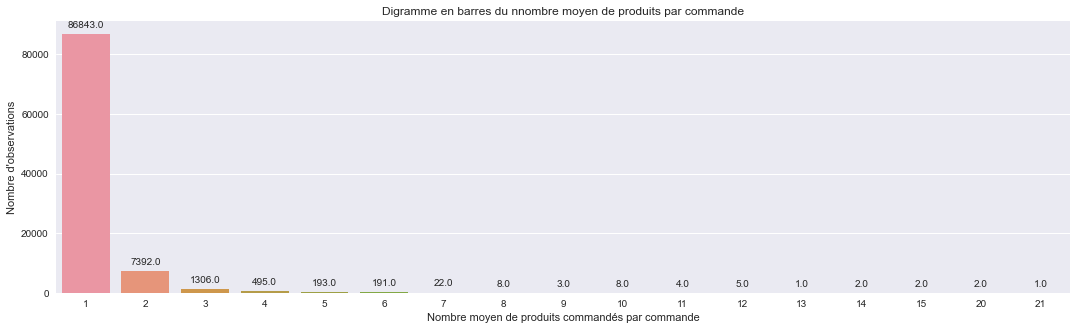

In [16]:
avg_products_by_order = data.groupby(['customer_unique_id', 'order_id'], as_index=False).agg(avg_products_by_orders=pd.NamedAgg(column='order_item_id', aggfunc='count'))

avg_products = avg_products_by_order['avg_products_by_orders'].value_counts().index
count = avg_products_by_order['avg_products_by_orders'].value_counts().values

fig = plt.figure(figsize=(40,5))


ax = fig.add_subplot(121)
bplot = sns.barplot(data=avg_products_by_order, x=avg_products, y=count)

for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Nombre moyen de produits commandés par commande")
plt.ylabel("Nombre d'observations")
plt.title("Digramme en barres du nnombre moyen de produits par commande")
plt.show()

Les clients on majoritairement commandé un produit par commande.

Observons le client qui a réalisé une moyenne de 21 produits par commande

In [17]:
avg_products_by_order[avg_products_by_order['avg_products_by_orders']==21]
print(f"Nombre de commandes de l'utilisateur à la moyenne de 21 produits par commandes {data[data['customer_unique_id']=='4546caea018ad8c692964e3382debd19']['order_id'].nunique()}")
print("Commande contenant 21 produits")
display(data[data['customer_unique_id']=='4546caea018ad8c692964e3382debd19'])

Nombre de commandes de l'utilisateur à la moyenne de 21 produits par commandes 1
Commande contenant 21 produits


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
56452,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,1.0,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,45.0,232.0,3.0,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,1.0,credit_card,2.0,196.11,e8236fe7b6e1bdd513a500de361e2b87,1,NaN,Eu estou tentando cancelar faz tempo devido o ...,2017-07-30 00:00:00,2017-07-30 14:19:07
56453,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,2.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,45.0,231.0,3.0,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,1.0,credit_card,2.0,196.11,e8236fe7b6e1bdd513a500de361e2b87,1,NaN,Eu estou tentando cancelar faz tempo devido o ...,2017-07-30 00:00:00,2017-07-30 14:19:07
56454,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,3.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,45.0,231.0,3.0,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,1.0,credit_card,2.0,196.11,e8236fe7b6e1bdd513a500de361e2b87,1,NaN,Eu estou tentando cancelar faz tempo devido o ...,2017-07-30 00:00:00,2017-07-30 14:19:07
56455,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,4.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,45.0,231.0,3.0,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,1.0,credit_card,2.0,196.11,e8236fe7b6e1bdd513a500de361e2b87,1,NaN,Eu estou tentando cancelar faz tempo devido o ...,2017-07-30 00:00:00,2017-07-30 14:19:07
56456,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,5.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,45.0,231.0,3.0,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,1.0,credit_card,2.0,196.11,e8236fe7b6e1bdd513a500de361e2b87,1,NaN,Eu estou tentando cancelar faz tempo devido o ...,2017-07-30 00:00:00,2017-07-30 14:19:07
56457,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,6.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,health_beauty,45.0,231.0,3.0,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,1.0,credit_card,2.0,196.11,e8236fe7b6e1bdd513a500de361e2b87,1,NaN,Eu estou tentando cancelar faz tempo devido o ..

#### Calcul du nombre total de produits achetés sur la période

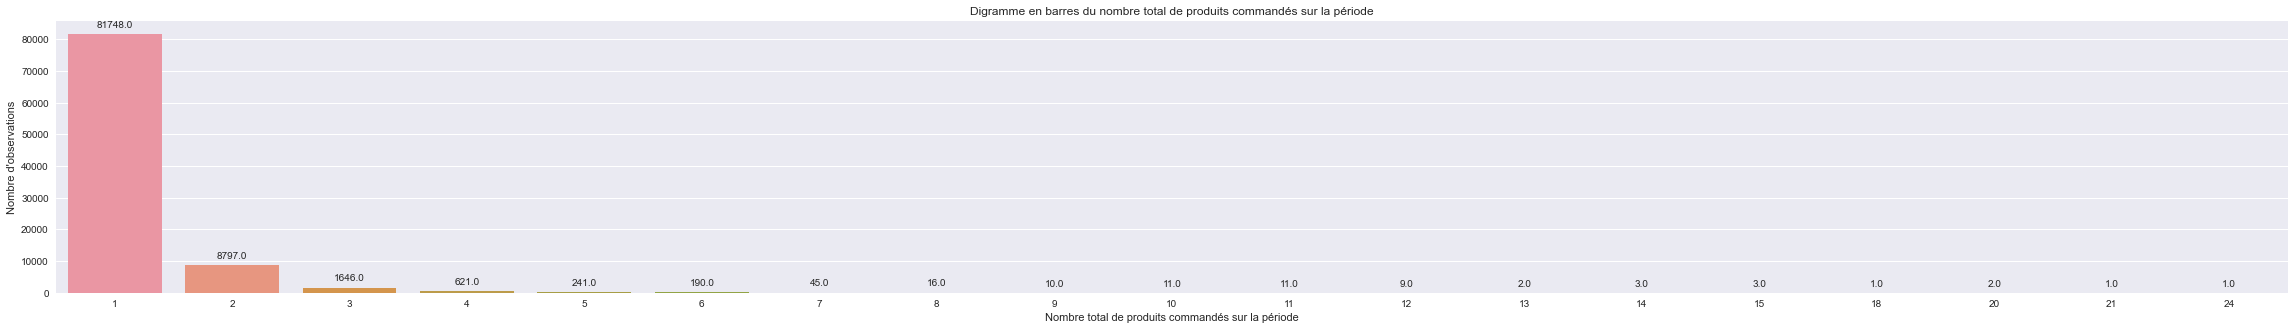

In [18]:
number_products_by_customers=avg_products_by_order.groupby('customer_unique_id', as_index=False).agg(total_bought_products=pd.NamedAgg(column='avg_products_by_orders', aggfunc='sum'))

total_bought_products = number_products_by_customers['total_bought_products'].value_counts().index
count_avg_products_by_orders = number_products_by_customers['total_bought_products'].value_counts()

fig = plt.figure(figsize=(40,5))


ax = fig.add_subplot(111)
bplot = sns.barplot(data=number_products_by_customers, x=total_bought_products, y=count_avg_products_by_orders)

for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Nombre total de produits commandés sur la période")
plt.ylabel("Nombre d'observations")
plt.title("Digramme en barres du nombre total de produits commandés sur la période")
plt.show()

Les clients ont majoritairement commandé un produit sur la période. Observons le clients qui a commandé 24 produits sur la période.

In [19]:
number_products_by_customers[number_products_by_customers['total_bought_products']==24]
print(f"Nombre de commandes de l'utilisateur qui a commandé 24 produits syr la période: {data[data['customer_unique_id']=='c8460e4251689ba205045f3ea17884a1']['order_id'].nunique()}")
print("Affichage de l'historique de l'utilisateur qui a commandé 24 produits sur la période")
data[data['customer_unique_id']=='c8460e4251689ba205045f3ea17884a1']

Nombre de commandes de l'utilisateur qui a commandé 24 produits syr la période: 4
Affichage de l'historique de l'utilisateur qui a commandé 24 produits sur la période


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
47181,9e478f18132211e1d6cf2637d12cc559,c8460e4251689ba205045f3ea17884a1,91170,porto alegre,RS,8e8f8ef29c78c7b9c98cac70dd331ce2,delivered,2018-08-08 14:24:24,2018-08-09 08:50:25,2018-08-14 18:00:00,2018-08-21 15:32:26,2018-08-27 00:00:00,1.0,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-15 08:50:25,170.0,30.44,telephony,58.0,1500.0,4.0,700.0,32.0,15.0,21.0,42738.0,lauro de freitas,BA,1.0,credit_card,6.0,1202.64,516bdeebf0104a4aff831308699d2735,4,NaN,NaN,2018-08-22 00:00:00,2018-08-22 22:11:09
47182,9e478f18132211e1d6cf2637d12cc559,c8460e4251689ba205045f3ea17884a1,91170,porto alegre,RS,8e8f8ef29c78c7b9c98cac70dd331ce2,delivered,2018-08-08 14:24:24,2018-08-09 08:50:25,2018-08-14 18:00:00,2018-08-21 15:32:26,2018-08-27 00:00:00,2.0,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-15 08:50:25,170.0,30.44,telephony,58.0,1500.0,4.0,700.0,32.0,15.0,21.0,42738.0,lauro de freitas,BA,1.0,credit_card,6.0,1202.64,516bdeebf0104a4aff831308699d2735,4,NaN,NaN,2018-08-22 00:00:00,2018-08-22 22:11:09
47183,9e478f18132211e1d6cf2637d12cc559,c8460e4251689ba205045f3ea17884a1,91170,porto alegre,RS,8e8f8ef29c78c7b9c98cac70dd331ce2,delivered,2018-08-08 14:24:24,2018-08-09 08:50:25,2018-08-14 18:00:00,2018-08-21 15:32:26,2018-08-27 00:00:00,3.0,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-15 08:50:25,170.0,30.44,telephony,58.0,1500.0,4.0,700.0,32.0,15.0,21.0,42738.0,lauro de freitas,BA,1.0,credit_card,6.0,1202.64,516bdeebf0104a4aff831308699d2735,4,NaN,NaN,2018-08-22 00:00:00,2018-08-22 22:11:09
47184,9e478f18132211e1d6cf2637d12cc559,c8460e4251689ba205045f3ea17884a1,91170,porto alegre,RS,8e8f8ef29c78c7b9c98cac70dd331ce2,delivered,2018-08-08 14:24:24,2018-08-09 08:50:25,2018-08-14 18:00:00,2018-08-21 15:32:26,2018-08-27 00:00:00,4.0,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-15 08:50:25,170.0,30.44,telephony,58.0,1500.0,4.0,700.0,32.0,15.0,21.0,42738.0,lauro de freitas,BA,1.0,credit_card,6.0,1202.64,516bdeebf0104a4aff831308699d2735,4,NaN,NaN,2018-08-22 00:00:00,2018-08-22 22:11:09
47185,9e478f18132211e1d6cf2637d12cc559,c8460e4251689ba205045f3ea17884a1,91170,porto alegre,RS,8e8f8ef29c78c7b9c98cac70dd331ce2,delivered,2018-08-08 14:24:24,2018-08-09 08:50:25,2018-08-14 18:00:00,2018-08-21 15:32:26,2018-08-27 00:00:00,5.0,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-15 08:50:25,170.0,30.44,telephony,58.0,1500.0,4.0,700.0,32.0,15.0,21.0,42738.0,lauro de freitas,BA,1.0,credit_card,6.0,1202.64,516bdeebf0104a4aff831308699d2735,4,NaN,NaN,2018-08-22 00:00:00,2018-08-22 22:11:09
47186,9e478f18132211e1d6cf2637d12cc559,c8460e4251689ba205045f3ea17884a1,91170,porto alegre,RS,8e8f8ef29c78c7b9c98cac70dd331ce2,delivered,2018-08-08 14:24:24,2018-08-09 08:50:25,2018-08-14 18:00:00,2018-08-21 15:32:26,2018-08-27 00:00:00,6.0,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-15 08:50:25,170.0,30.44,telephony,58.0,1500.0,4.0,700.0,32.0,15.0,21.0,42738.0,lauro de freitas,BA,1.0,credit_card,6.0,1202.64,516bdeebf0104a4aff831308699d2735,4,NaN,NaN,2018-08-22 00:00:00,2018-08-22 22:11:09
86510,a7ab31829dc9a10f37e82b1e1afd26b6,c8460e4251689ba205045f3ea17884a1,91170,porto alegre,RS,03aba68b07658f28f29612641f08d4ba,delivered,2018-08-08 14

### Première et dernière commande

In [20]:
first_last_orders = data.groupby(['customer_unique_id'], as_index=False).agg(first_order=pd.NamedAgg(column='order_purchase_timestamp', aggfunc='min'),
                                                                             last_order=pd.NamedAgg(column='order_purchase_timestamp', aggfunc='max'))
first_last_orders

,customer_unique_id,first_order,last_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42
...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:00:36
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:07:56
93355,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 15:49:16
93356,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:17:41


### Prix moyen des produits par commande

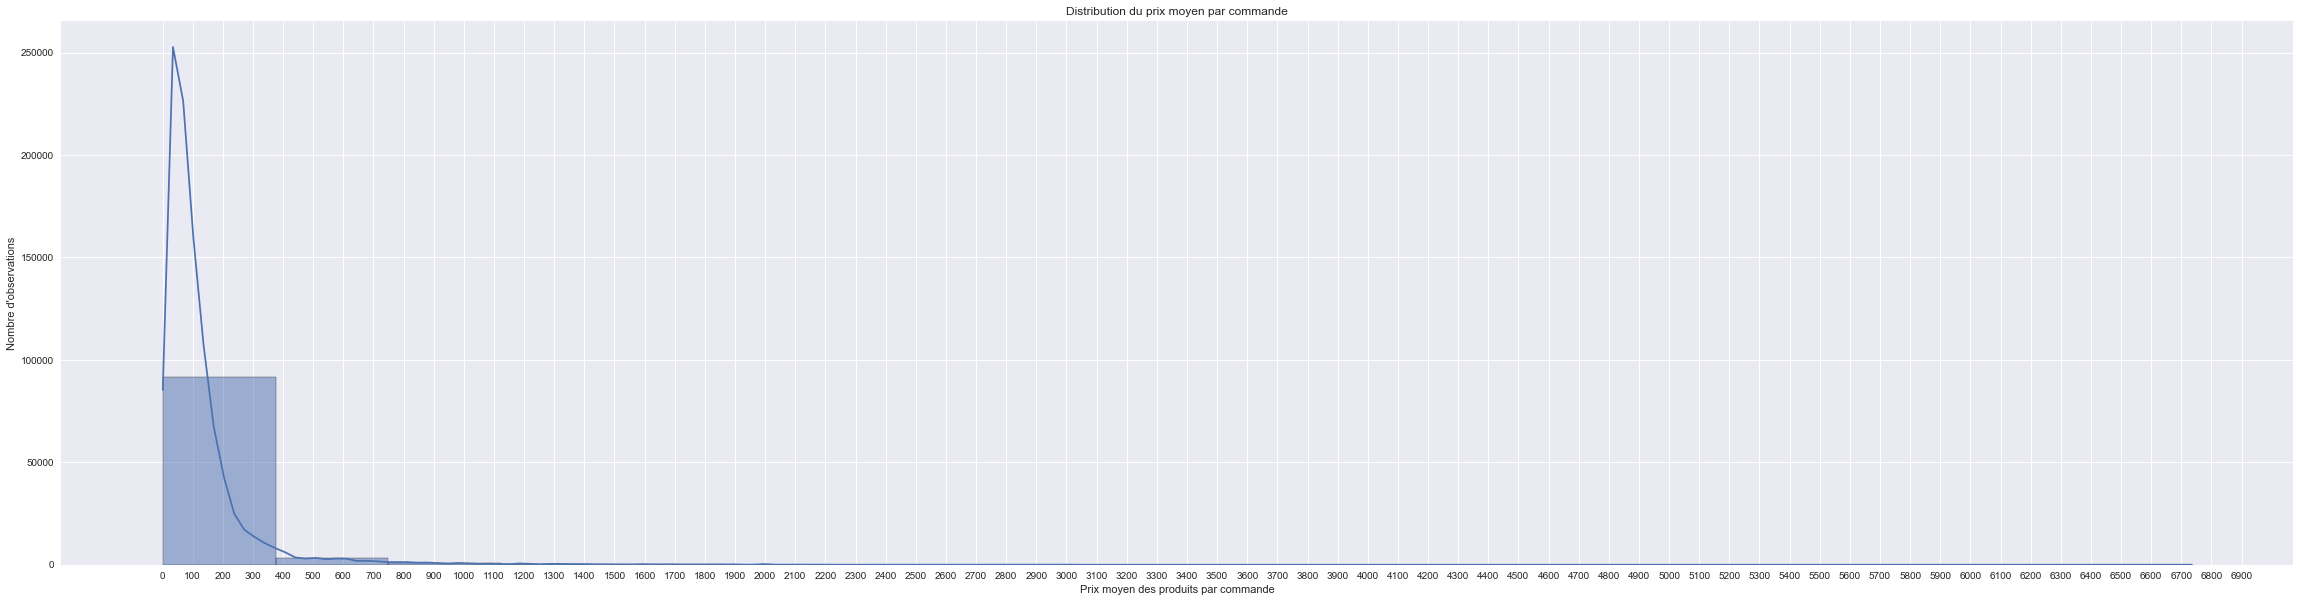

In [21]:
average_price_by_order = data.groupby(['customer_unique_id', 'order_id'],as_index=False).agg(average_price=pd.NamedAgg(column='price', aggfunc='mean'))

fig = plt.figure(figsize=(40,10))

ax = fig.add_subplot(111)
dplot = sns.histplot(ax=ax, data=average_price_by_order, x='average_price', bins='sturges', kde=True)
plt.xticks(range(0,7000,100))
plt.xlabel("Prix moyen des produits par commande")
plt.ylabel("Nombre d'observations")
plt.title("Distribution du prix moyen par commande")

plt.show()

On constate un coude sur le prix moyen par commande un peu avant les 300 Reals.

### Prix moyen des produits achetés sur la période

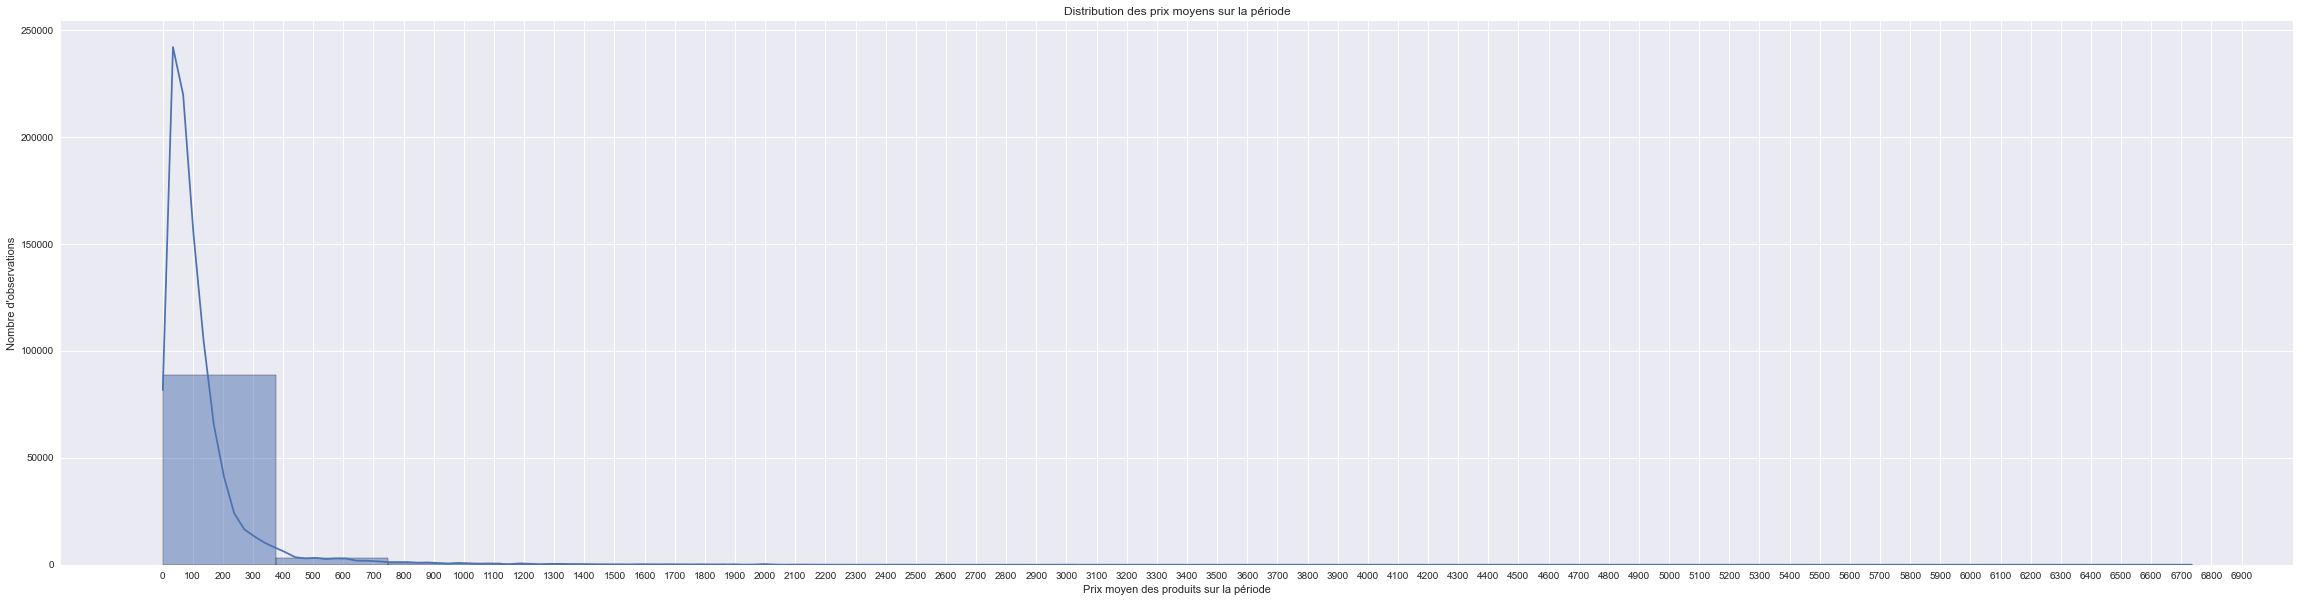

In [22]:
global_average_price = average_price_by_order.groupby(['customer_unique_id'], as_index=False)['average_price'].mean()


fig = plt.figure(figsize=(40,10))

ax = fig.add_subplot(111)
dplot = sns.histplot(ax=ax, data=global_average_price , x='average_price', bins='sturges', kde=True)
plt.xticks(range(0,7000,100))
plt.xlabel("Prix moyen des produits sur la période")
plt.ylabel("Nombre d'observations")
plt.title("Distribution des prix moyens sur la période")

plt.show()

On également un coude sur le prix moyen par commande un peu avant les 300 Reals.

### Montant des paniers par commande

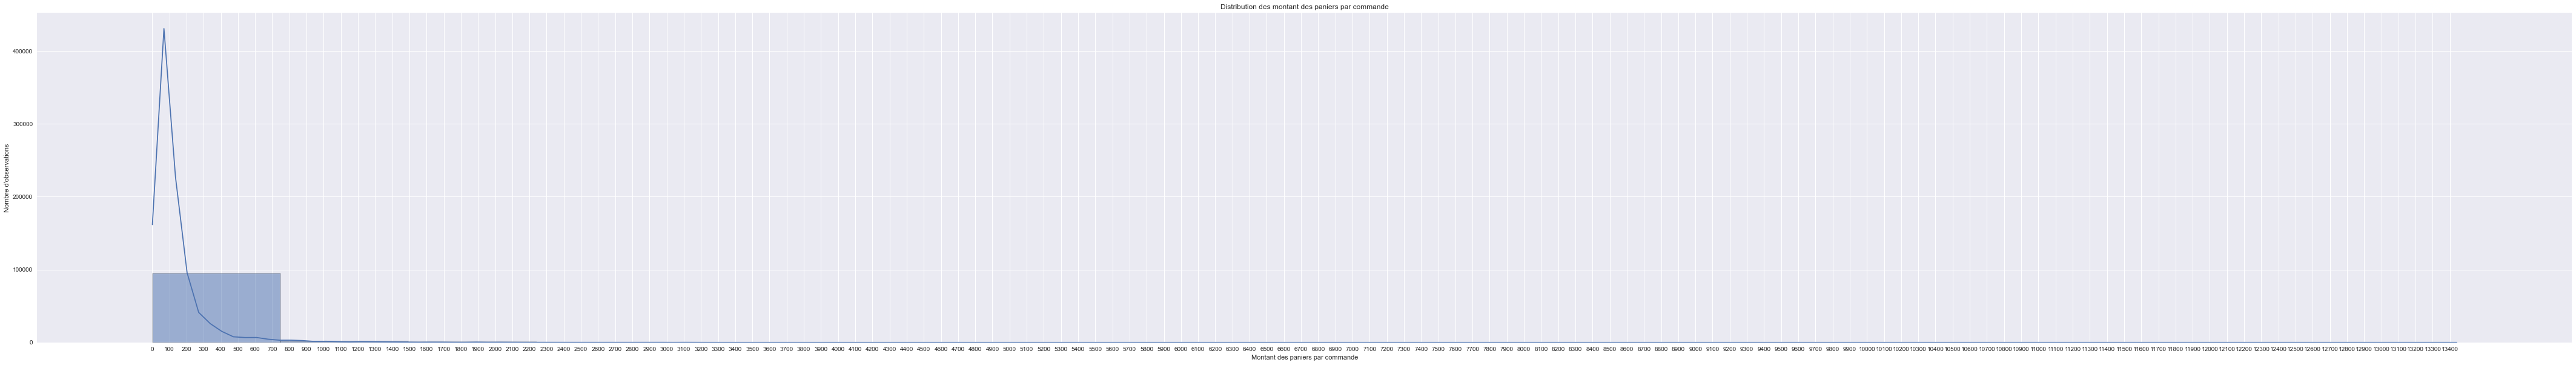

In [23]:
amount_by_cart = data.groupby(['customer_unique_id', 'order_id'],as_index=False).agg(average_amount=pd.NamedAgg(column='price', aggfunc='sum'))

fig = plt.figure(figsize=(75,10))

ax = fig.add_subplot(111)
dplot = sns.histplot(ax=ax, data=amount_by_cart , x='average_amount', bins='sturges', kde=True)
plt.xticks(range(0,13500,100))
plt.xlabel("Montant des paniers par commande")
plt.ylabel("Nombre d'observations")
plt.title("Distribution des montant des paniers par commande")

plt.show()

#### Montant moyen des paniers sur la période

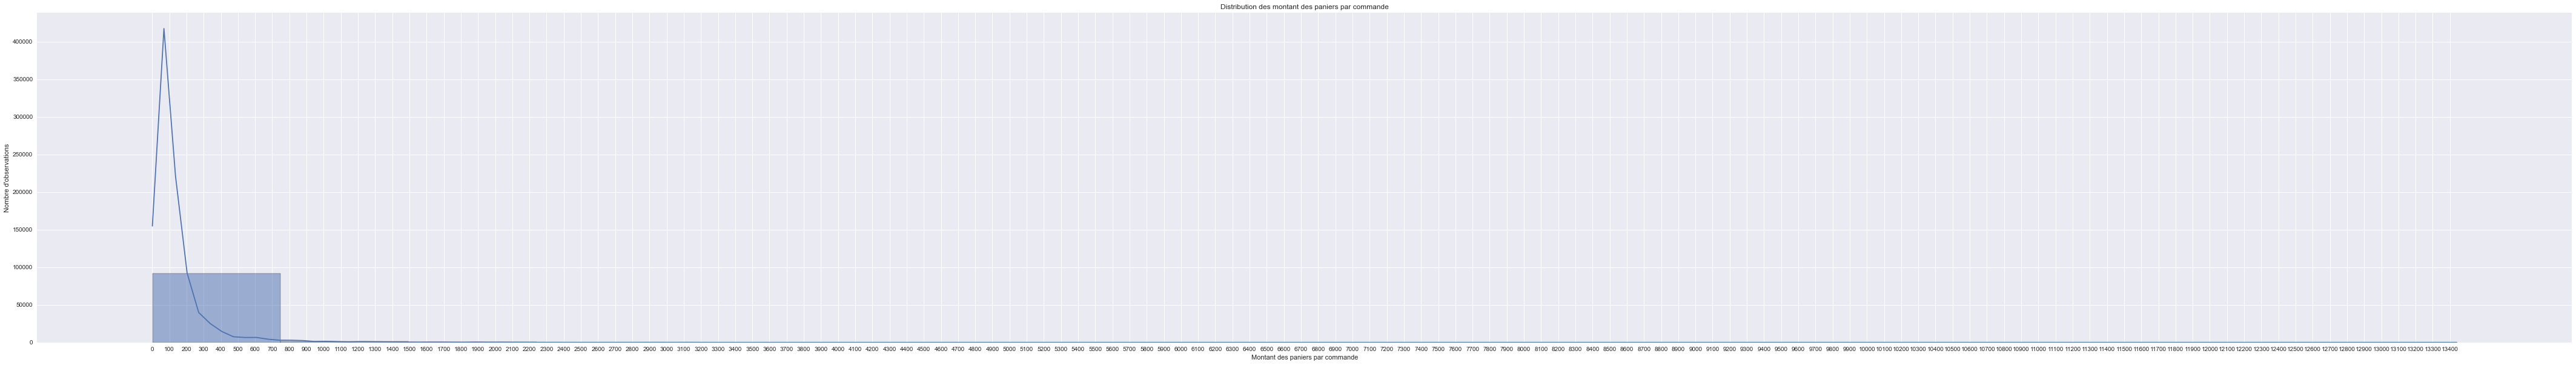

In [24]:
average_cart = amount_by_cart.groupby('customer_unique_id',as_index=False).agg(average_cart=pd.NamedAgg(column='average_amount', aggfunc='mean'))

fig = plt.figure(figsize=(75,10))

ax = fig.add_subplot(111)
dplot = sns.histplot(ax=ax, data=average_cart , x='average_cart', bins='sturges', kde=True)
plt.xticks(range(0,13500,100))
plt.xlabel("Montant des paniers par commande")
plt.ylabel("Nombre d'observations")
plt.title("Distribution des montant des paniers par commande")

plt.show()

### Note moyenne sur la période

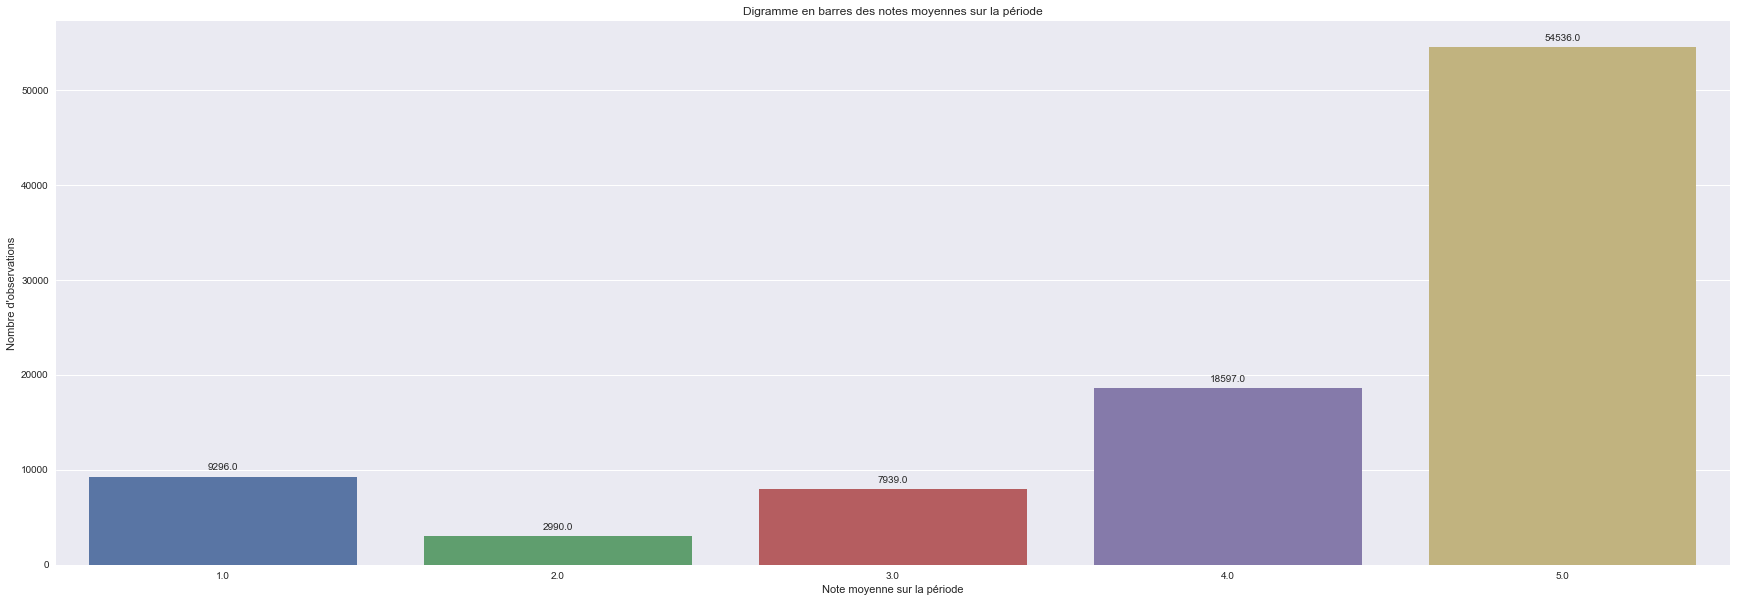

In [25]:
reviews_scores_by_customer = data.groupby(['customer_unique_id'],as_index=False).agg(avg_score=pd.NamedAgg(column='review_score', aggfunc='mean'))

reviews_scores_by_customer['avg_score'] = reviews_scores_by_customer['avg_score'].apply(np.floor)
avg_score = reviews_scores_by_customer['avg_score'].value_counts().index
count_avg_score = reviews_scores_by_customer['avg_score'].value_counts()

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
bplot = sns.barplot(data=reviews_scores_by_customer, x=avg_score, y=count_avg_score)

for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Note moyenne sur la période")
plt.ylabel("Nombre d'observations")
plt.title("Digramme en barres des notes moyennes sur la période")
plt.show()

#### Nombre commentaires laissés par utilisateurs

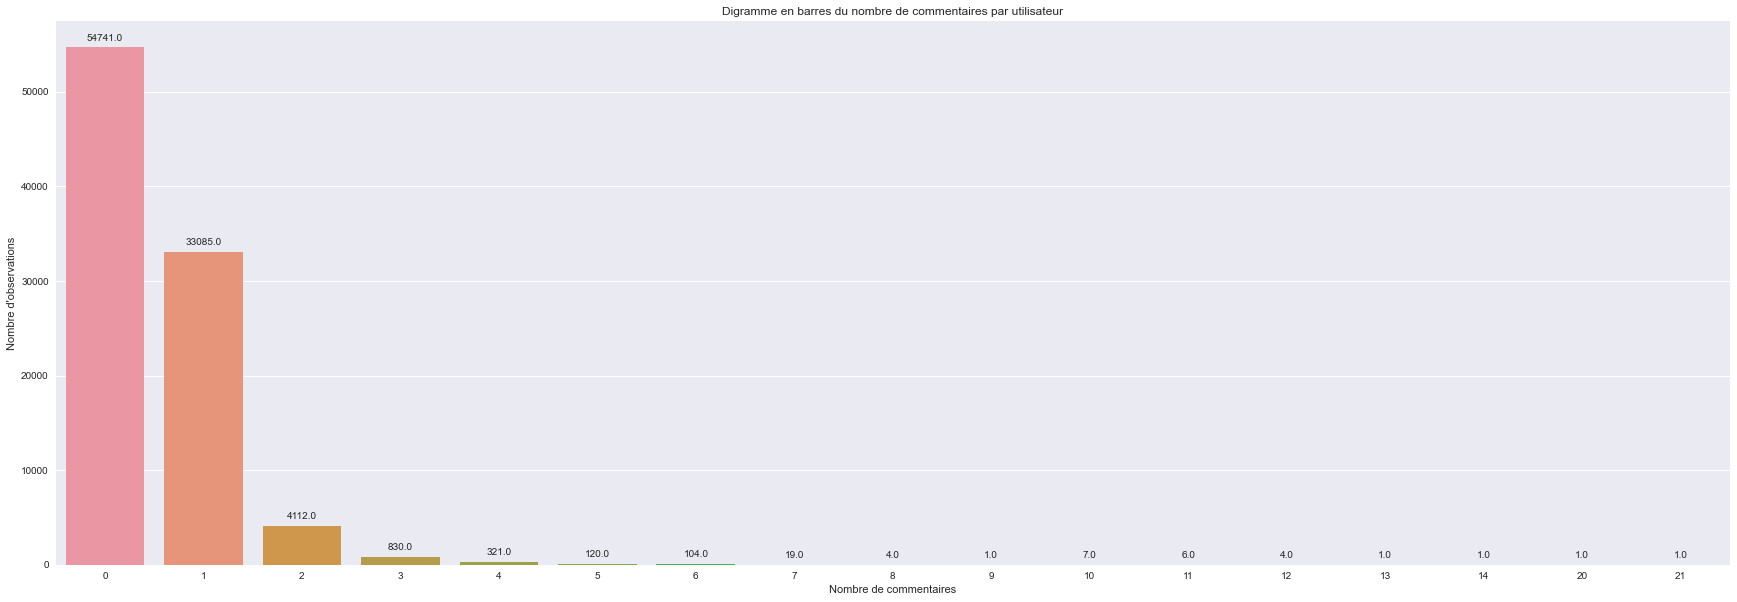

In [26]:
reviews_by_customers = data.groupby(['customer_unique_id'],as_index=False)['review_comment_message'].count()
reviews_by_customers.rename(columns={'review_comment_message':'comments_count'}, inplace=True)

comments = reviews_by_customers['comments_count'].value_counts().index
count_comments = reviews_by_customers['comments_count'].value_counts()

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
bplot = sns.barplot(data=reviews_by_customers, x=comments, y=count_comments)

for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Nombre de commentaires")
plt.ylabel("Nombre d'observations")
plt.title("Digramme en barres du nombre de commentaires par utilisateur")
plt.show()

#### Proportion de produits commandés chez un fournisseur dans le même état pour chaque client

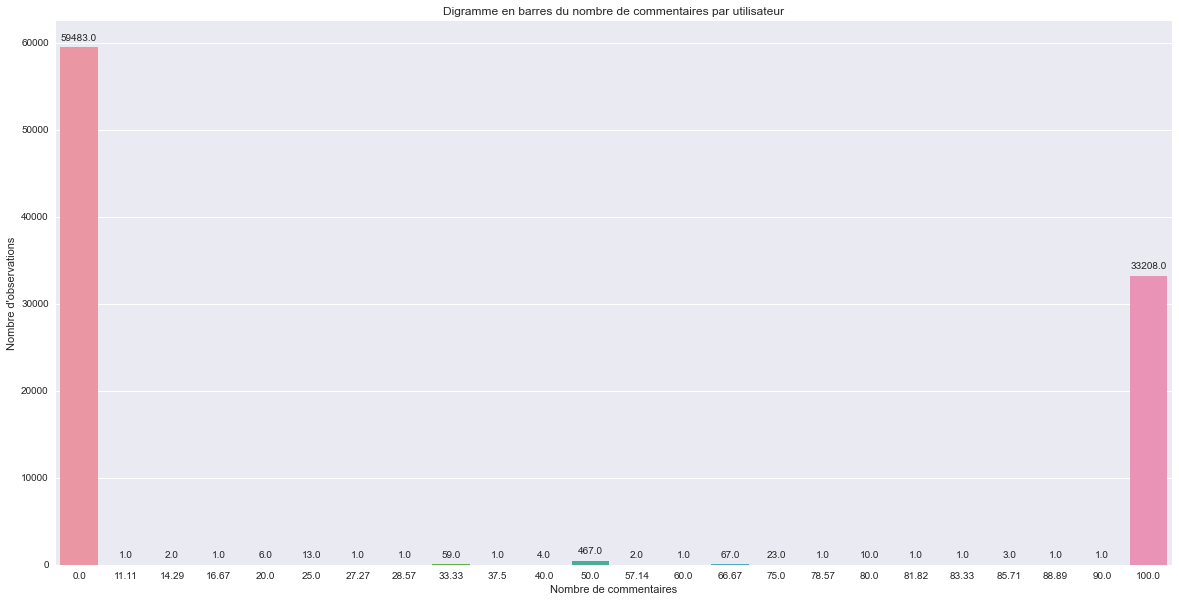

In [27]:
data['same_state_order'] = data['customer_state'] == data['seller_state']
data['same_state_order'] = data['same_state_order'].astype('int')


number_of_same_state_products =  data.groupby(['customer_unique_id'], as_index=False).agg(number_same_sate_orders = pd.NamedAgg(column='same_state_order', aggfunc='sum'))

prop_same_state_products = number_of_same_state_products.merge(number_products_by_customers, how='left', on='customer_unique_id')
prop_same_state_products['prop_same_state'] = np.round_(prop_same_state_products['number_same_sate_orders']/prop_same_state_products['total_bought_products']*100,2)

same_state_prop = prop_same_state_products['prop_same_state'].value_counts().index
count_same_state_prop =  prop_same_state_products['prop_same_state'].value_counts()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
bplot = sns.barplot(data=prop_same_state_products, x=same_state_prop, y=count_same_state_prop)

for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Nombre de commentaires")
plt.ylabel("Nombre d'observations")
plt.title("Digramme en barres du nombre de commentaires par utilisateur")


plt.show()


### Proportions de familles de produits achetées

In [28]:
ordered_product_category = data.loc[:, ['customer_unique_id','product_category_name']]
product_category_by_customer = pd.crosstab(ordered_product_category['customer_unique_id'], ordered_product_category['product_category_name'], dropna=False)

product_category_by_customer.reset_index(inplace=True)

product_category_and_number_products_by_customers = number_products_by_customers.merge(product_category_by_customer, how='left', on = 'customer_unique_id')

product_category_and_number_products_by_customers

,customer_unique_id,total_bought_products,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,uncategorized,watches_gifts
0,0000366f3b9a7992bf8c76cfdf3221e2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0000f46a3911fa3c0805444483337064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0004aac84e0df4da2b147fca70cf8255,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93354,fffea47cd6d3cc0a88bd621562a9d061,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93355,ffff371b4d645b6ecea244b27531430a,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93356,ffff5962728ec6157033ef9805bacc48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
def compute_proportion(row, prop_col, total_col):
    """
    Transforme each value of a series to a proportion of the total_col value.
    
    Args:
        row(Object): Row of the dataframe
        prop_col(string): Name of selected series to transforme
        total_col(sring): Name of selected series to compute proportion 
    
    Returns: Computed proportions
    """
    
    return round((row[prop_col]/row[total_col]*100),2)

category_cols = product_category_and_number_products_by_customers.iloc[:,2:].columns

for col in category_cols:
    product_category_and_number_products_by_customers[col] = product_category_and_number_products_by_customers.apply(compute_proportion, prop_col=col, total_col='total_bought_products', axis=1)

In [30]:
product_category_and_number_products_by_customers

,customer_unique_id,total_bought_products,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,uncategorized,watches_gifts
0,0000366f3b9a7992bf8c76cfdf3221e2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93354,fffea47cd6d3cc0a88bd621562a9d061,1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93355,ffff371b4d645b6ecea244b27531430a,1,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

10000.0